In [4]:
# -*- coding: utf-8 -*-

%pip install pandas
%pip install ipywidgets

# create a dataframe with sample data
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35], 'Gender': ['F', 'M', 'M']})
print(df)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
      Name  Age Gender
0    Alice   25      F
1      Bob   30      M
2  Charlie   35      M


In [5]:
import pandas as pd  

# Accept image path and optional alias from user input

while True:
    image_path = input("Enter the image path (folder or zip file only): ")
    if image_path.lower().endswith(('.zip', '/')):
        break
    print("Invalid input. Please enter a folder path or a zip file.")
alias = input("Enter an optional alias (press Enter to skip): ")

print(f"Image path: {image_path}")
if alias:
    print(f"Alias: {alias}")
else:
    print("No alias provided.")

Image path: /run/media/luxcium/2TB-Seagate/MJ-backups/others/generation_361fee5e-9471-4c5b-ab1c-8f5fcd216b47_images.zip
Alias: mj-others-test


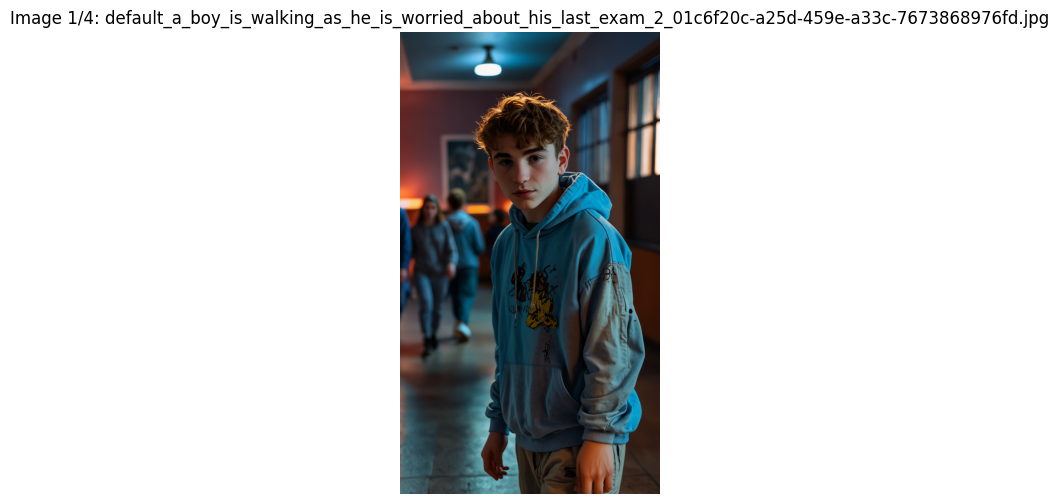

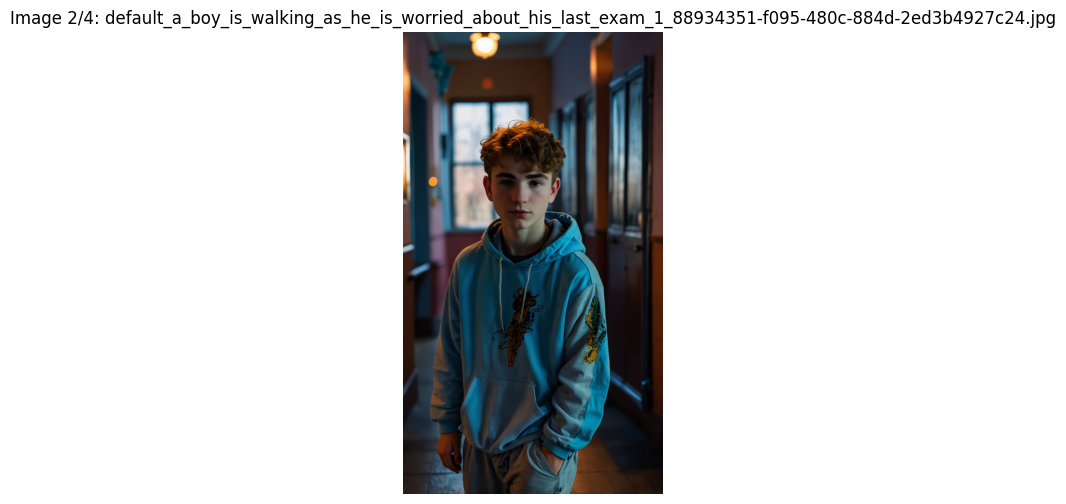

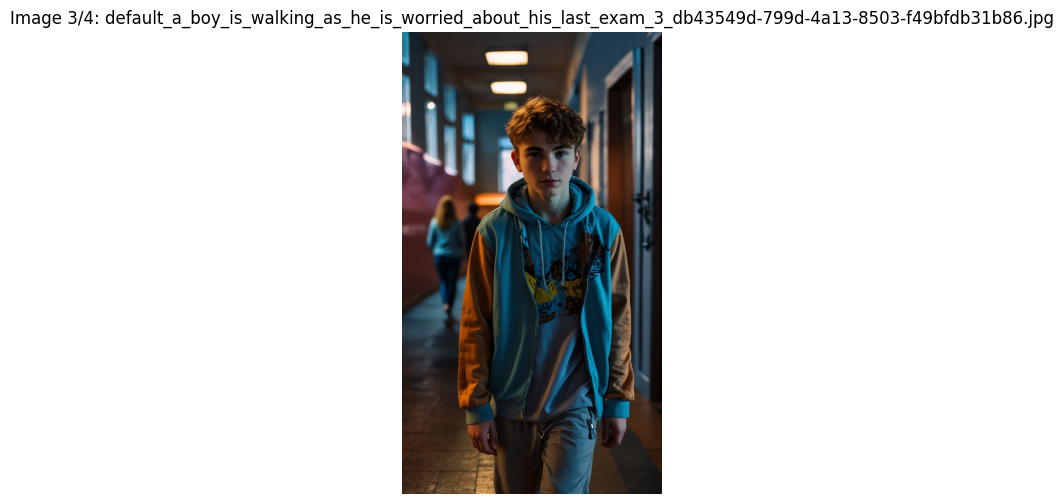

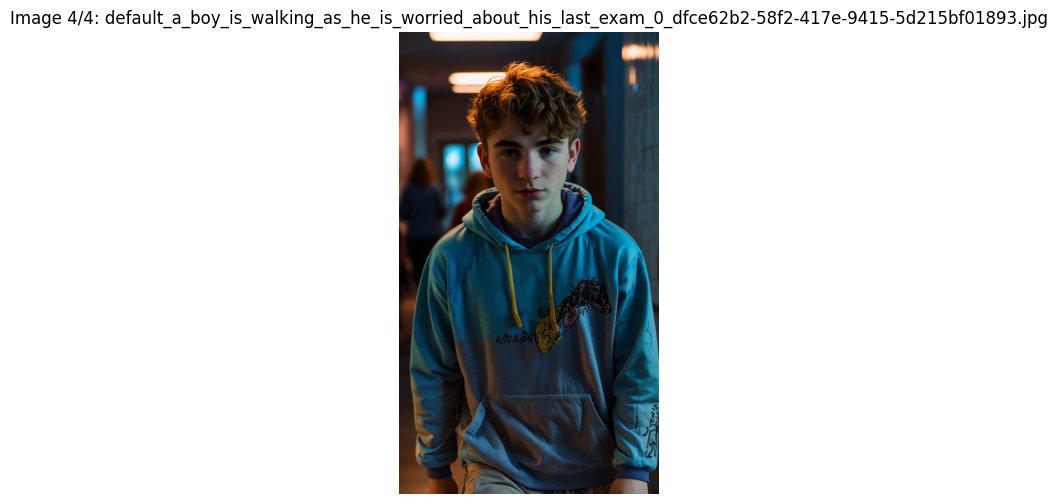

In [6]:
import os
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt

# Function to extract images from a zip file or list images in a folder
def get_image_paths(path):
    image_paths = []
    if path.endswith('.zip'):
        with ZipFile(path, 'r') as zip_ref:
            zip_ref.extractall('temp_images')  # Extract to a temporary folder
            image_paths = [os.path.join('temp_images', file) for file in zip_ref.namelist() if file.lower().endswith(('png', 'jpg', 'jpeg'))]
    else:
        image_paths = [os.path.join(path, file) for file in os.listdir(path) if file.lower().endswith(('png', 'jpg', 'jpeg'))]
    return image_paths

# Function to visualize images
def visualize_images(image_paths):
    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.title(f"Image {i + 1}/{len(image_paths)}: {os.path.basename(img_path)}")
        plt.axis('off')
        plt.show()
        user_input = input("Press Enter to view the next image or type 'exit' to stop: ")
        plt.close()
        if user_input.lower() == 'exit':
            break

# Get image paths and visualize them
paths = get_image_paths(image_path)  # Using image_path from the previous cell
if paths:
    visualize_images(paths)
else:
    print("No images found in the provided path.")